# **Trader Sentiment Analysis:**

### Importing Neccessary libraries

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

### Data Loading & Data Understanding

In [23]:
historical_data = pd.read_csv('historical_data.csv')

/tmp/ipython-input-1777183230.py:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  historical_data = pd.read_csv('historical_data.csv')


In [24]:
historical_data.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.003055,1.050000e+15,1.730000e+12


In [25]:
historical_data.describe()

,Execution Price,Size Tokens,Size USD,Start Position,Closed PnL,Order ID,Fee,Trade ID,Timestamp
count,93186.000000,9.318600e+04,9.318600e+04,9.318600e+04,93186.000000,9.318500e+04,93185.000000,9.318500e+04,9.318500e+04
mean,17785.731738,7.333450e+03,8.761247e+03,2.882509e+04,81.401671,6.756635e+10,1.741345,5.628703e+14,1.736758e+12
std,35200.020690,1.527184e+05,5.174784e+04,4.823963e+05,1217.177914,2.192361e+10,9.081199,3.264101e+14,1.062417e+10
min,0.000005,5.330000e-06,0.000000e+00,-1.433463e+07,-117990.104100,1.732711e+08,-1.175712,0.000000e+00,1.680000e+12
25%,12.896000,8.974000e-01,2.099400e+02,-2.600000e-04,0.000000,6.254941e+10,0.010599,2.800000e+14,1.740000e+12
50%,21.466000,2.100000e+01,8.879650e+02,4.362575e+02,0.000000,7.440090e+10,0.096319,5.620000e+14,1.740000e+12
75%,2607.500000,1.325575e+02,3.506997e+03,2.748730e+04,9.989742,8.239360e+10,0.607824,8.470000e+14,1.740000e+12
max,108410.000000,1.582244e+07,3.921431e+06,3.050948e+07,135329.090100,9.014923e+10,837.471593,1.130000e+15,1.750000e+12


In [26]:
historical_data.shape #shape of the data

(93186, 16)

In [27]:
historical_data.isnull().sum() #is contain any null value or not

,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,0


In [28]:
historical_data.duplicated().sum() #is there any duplicated value

np.int64(0)

In [29]:
fear_greed_index = pd.read_csv('fear_greed_index.csv')

In [30]:
fear_greed_index.sample(5)

,timestamp,value,classification,date
2518,1735363800,72,Greed,2024-12-28
689,1577251800,22,Extreme Fear,2019-12-25
2167,1704951000,76,Extreme Greed,2024-01-11
343,1547357400,21,Extreme Fear,2019-01-13
2544,1737610200,75,Extreme Greed,2025-01-23


In [31]:
fear_greed_index.describe()

,timestamp,value
count,2.644000e+03,2644.000000
mean,1.631899e+09,46.981089
std,6.597967e+07,21.827680
min,1.517463e+09,5.000000
25%,1.574811e+09,28.000000
50%,1.631900e+09,46.000000
75%,1.688989e+09,66.000000
max,1.746164e+09,95.000000


In [32]:
fear_greed_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [33]:
fear_greed_index.shape

(2644, 4)

In [34]:
fear_greed_index.isnull().sum()

,0
timestamp,0
value,0
classification,0
date,0


In [35]:
fear_greed_index.duplicated().sum()

np.int64(0)

### Feature Engineering

In [36]:
# Standardize Sentiment Date
fear_greed_index['date'] = pd.to_datetime(fear_greed_index['date'])

In [37]:
# Standardize Trader Date
# Parsing 'Timestamp IST' (Day-Month-Year format inferred)
historical_data['datetime'] = pd.to_datetime(historical_data['Timestamp IST'], dayfirst=True, errors='coerce')

In [38]:
# Normalize to date only for merging
historical_data['date'] = historical_data['datetime'].dt.normalize()

In [39]:
# Inner merge to align trading days with the sentiment
merged = pd.merge(historical_data, fear_greed_index, on='date', how='inner')

In [40]:
#Trade Direction Classification
def categorize_trade(direction):
    d = str(direction).lower()
    if 'open long' in d: return 'Open Long'
    if 'open short' in d: return 'Open Short'
    if 'close' in d: return 'Close'
    return 'Other'

merged['Trade Category'] = merged['Direction'].apply(categorize_trade)

In [41]:
merged.sample(5)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Crossed,Fee,Trade ID,Timestamp,datetime,date,timestamp,value,classification,Trade Category
55196,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,@107,23.739,5.00,118.70,BUY,02-02-2025 03:59,2829.919439,Buy,0.0000,...,True,0.001750,2.170000e+14,1.740000e+12,2025-02-02 03:59:00,2025-02-02,1738474200,60,Greed,Other
55915,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,@107,21.882,10.00,218.82,BUY,24-02-2025 12:36,3498.782914,Buy,0.0000,...,True,0.003500,7.720000e+14,1.740000e+12,2025-02-24 12:36:00,2025-02-24,1740375000,49,Neutral,Other
44357,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,ETH,2229.200,2.00,4458.40,SELL,05-08-2024 17:57,64.065800,Close Long,-1162.5200,...,True,1.560440,5.780000e+14,1.720000e+12,2024-08-05 17:57:00,2024-08-05,1722835800,26,Fear,Close
51852,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,HYPE,14.460,75.00,1084.50,SELL,11-03-2025 17:14,26781.460000,Close Long,12.4725,...,True,0.379575,8.200000e+14,1.740000e+12,2025-03-11 17:14:00,2025-03-11,1741671000,24,Extreme Fear,Close
81414,0xbaaaf6571ab7d571043ff1e313a9609a10637864,HYPE,12.208,0.83,10.13,BUY,03-04-2025 04:14,91558.030000,Open Long,0.0000,...,False,0.001013,6.990000e+14,1.740000e+12,2025-04-03 04:14:00,2025-04-03,1743658200,25,Fear,Open Long


In [42]:
merged['Coin'].unique()

array(['@107', 'AAVE', 'DYDX', 'AIXBT', 'GMX', 'EIGEN', 'HYPE', 'SOL',
       'SUI', 'DOGE', 'ETH', 'kPEPE', 'TRUMP', 'ONDO', 'ENA', 'LINK',
       'XRP', 'S', 'BNB', 'BERA', 'WIF', 'LAYER', 'MKR', 'KAITO', 'IP',
       'JUP', 'USUAL', 'ADA', 'BTC', 'PURR/USDC', 'ZRO', '@7', '@19',
       '@21', '@44', '@48', '@11', '@15', '@46', '@61', '@28', '@45',
       '@9', '@41', '@38', 'kSHIB', 'GRASS', 'TAO', 'AVAX', '@2', '@6',
       '@8', '@10', '@12', '@16', '@17', '@35', '@26', '@24', '@32',
       '@29', '@31', '@33', '@34', '@36', '@37', '@47', '@53', '@74',
       'RUNE', 'CANTO', 'NTRN', 'BLUR', 'ZETA', 'MINA', 'MANTA', 'RNDR',
       'WLD', 'kBONK', 'ALT', 'INJ', 'STG', 'ZEN', 'MAVIA', 'PIXEL',
       'ILV', 'FET', 'STRK', 'CAKE', 'STX', 'ACE', 'PENDLE', 'AR', 'XAI',
       'APE', 'MEME', 'NEAR', 'SEI', 'FTM', 'MYRO', 'BIGTIME', 'IMX',
       'BADGER', 'POLYX', 'OP', 'TNSR', 'MAV', 'TIA', 'MERL', 'TON',
       'PURR', 'ME', 'CRV', 'BRETT', 'CHILLGUY', 'MOODENG', 'VIRTUAL',
       'CO

In [43]:
merged['Coin'].value_counts()

,count
Coin,
HYPE,36177
BTC,18852
@107,8361
ETH,7017
SOL,3021
...,...
@42,1
@30,1
@18,1


In [44]:
# Filter for opening trades to see bias
opening_trades = merged[merged['Trade Category'].isin(['Open Long', 'Open Short'])]
bias_stats = opening_trades.groupby(['classification', 'Trade Category']).size().unstack(fill_value=0)
bias_stats = bias_stats.reindex(['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed'])

In [45]:
# Filter for realized PnL to see performance
realized = merged[merged['Closed PnL'] != 0].copy()
realized['Win'] = realized['Closed PnL'] > 0

In [46]:
perf_stats = realized.groupby('classification').agg({
    'Closed PnL': lambda x: (x[x>0].sum() / abs(x[x<0].sum())) if x[x<0].sum() != 0 else np.nan,
    'Win': 'mean'
}).rename(columns={'Closed PnL': 'Profit Factor', 'Win': 'Win Rate'})
perf_stats = perf_stats.reindex(['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed'])

### setting path to store the images

In [47]:
root_dir = 'ds_'
output_dir = os.path.join(root_dir, 'outputs')
os.makedirs(output_dir, exist_ok=True)
sns.set(style="whitegrid", context="talk")

## **Data Visualization**

### **Plot A: Behavioral Bias (Long vs Short)**

<Figure size 100x600 with 0 Axes>

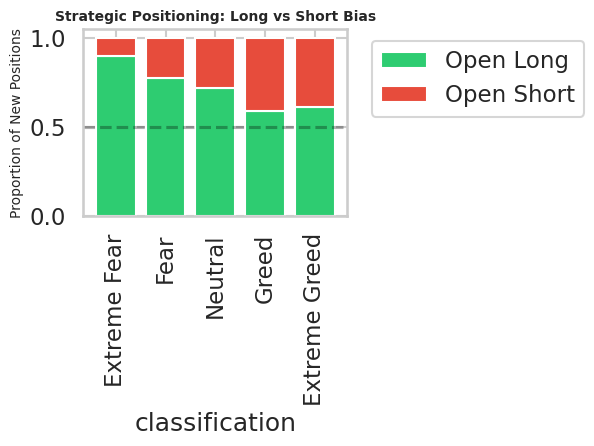

In [48]:
# Normalize to percentages
bias_pct = bias_stats.div(bias_stats.sum(axis=1), axis=0)

plt.figure(figsize=(1, 6))
bias_pct.plot(kind='bar', stacked=True, color=['#2ecc71', '#e74c3c'], width=0.8)
plt.title('Strategic Positioning: Long vs Short Bias', fontsize=10, fontweight='bold')
plt.ylabel('Proportion of New Positions', fontsize = 10)
plt.axhline(0.5, color='black', linestyle='--', alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()


In [49]:
plt.savefig(os.path.join(output_dir, 'strategic_bias.png'))
plt.close()

### **Plot B: Performance Matrix**

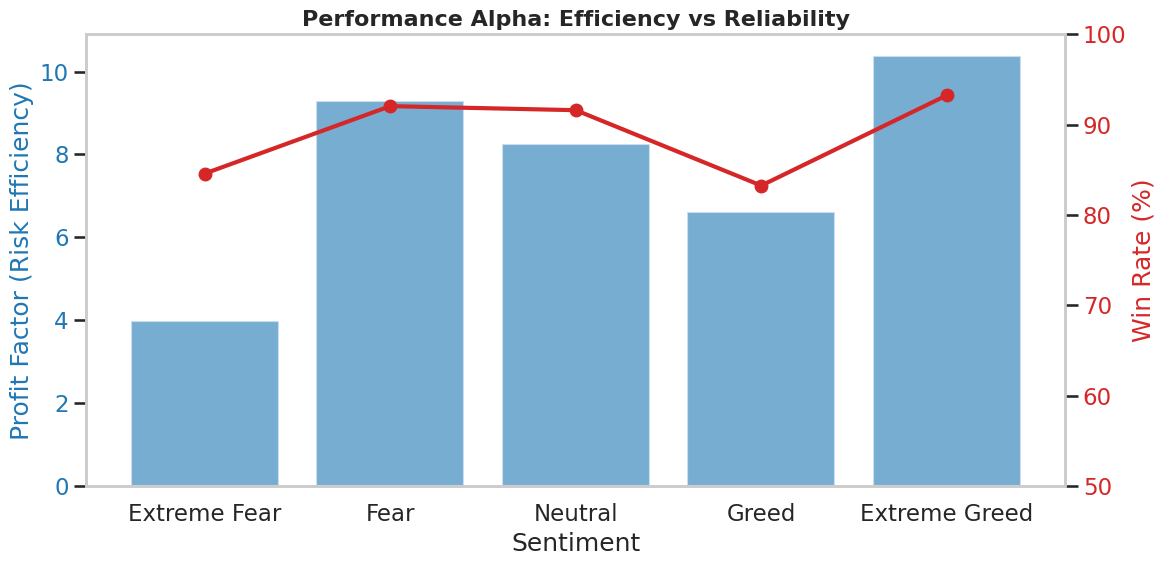

In [50]:
# Plot B: Performance Matrix
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Sentiment')
ax1.set_ylabel('Profit Factor (Risk Efficiency)', color=color)
ax1.bar(perf_stats.index, perf_stats['Profit Factor'], color=color, alpha=0.6)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(False)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Win Rate (%)', color=color)
ax2.plot(perf_stats.index, perf_stats['Win Rate']*100, color=color, marker='o', linewidth=3)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(50, 100)
ax2.grid(False)

plt.title('Performance Alpha: Efficiency vs Reliability', fontsize=16, fontweight='bold')
plt.tight_layout()


### **Plot C: Capital Allocation: Top 10 Traded Assets**

/tmp/ipython-input-1273835763.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_coins.values, y=top_coins.index, palette='Blues')


Text(0, 0.5, 'Asset Symbol')

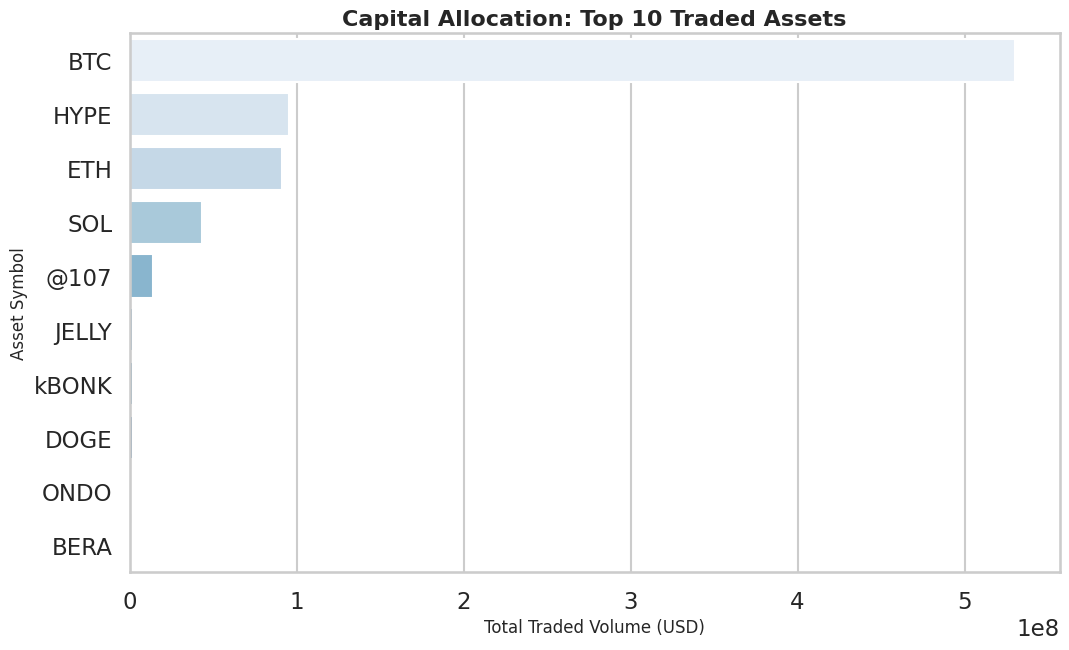

In [51]:
top_coins = historical_data.groupby('Coin')['Size USD'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 7))
sns.barplot(x=top_coins.values, y=top_coins.index, palette='Blues')
plt.title('Capital Allocation: Top 10 Traded Assets', fontsize=16, fontweight='bold')
plt.xlabel('Total Traded Volume (USD)', fontsize=12)
plt.ylabel('Asset Symbol', fontsize=12)

In [52]:
plt.savefig(os.path.join(output_dir, 'asset_allocation.png'), bbox_inches='tight')
plt.show()

<Figure size 640x480 with 0 Axes>

### **Plot D: Operational Rhythm: Weekly Trading Heatmap**

Text(129.08333333333334, 0.5, 'Day of Week')

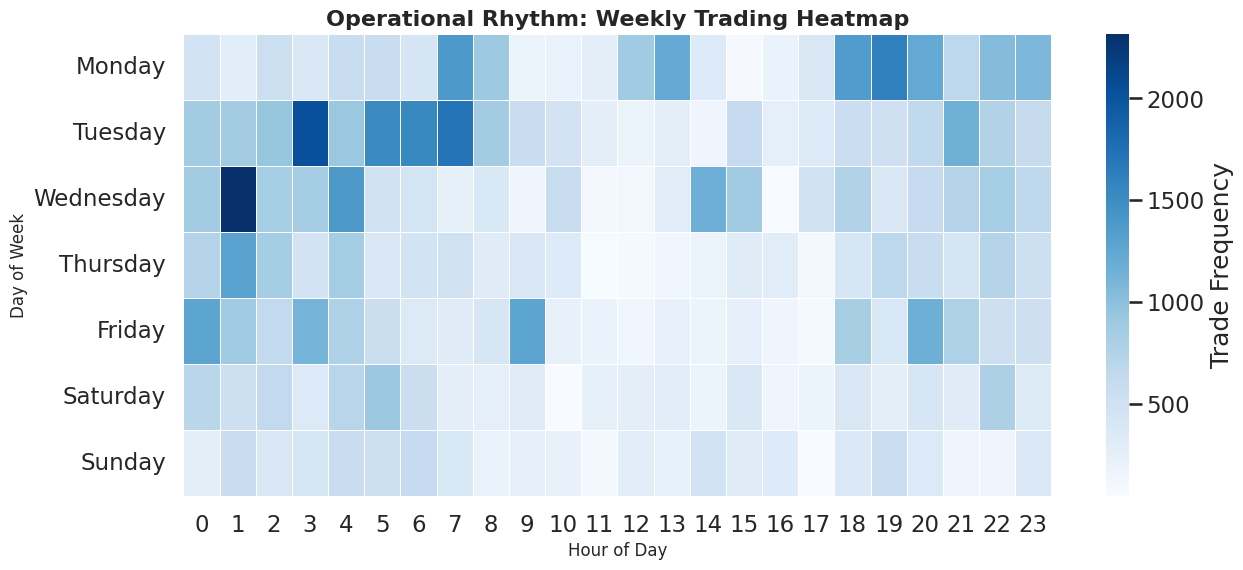

In [53]:
# Extract Hour and Day
historical_data['Hour'] = historical_data['datetime'].dt.hour
historical_data['DayOfWeek'] = historical_data['datetime'].dt.day_name()

# Creating Matrix
heatmap_data = historical_data.groupby(['DayOfWeek', 'Hour']).size().unstack(fill_value=0)
# Reorder for logical week view
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(days_order)

plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, cmap='Blues', linewidths=0.5, cbar_kws={'label': 'Trade Frequency'})
plt.title('Operational Rhythm: Weekly Trading Heatmap', fontsize=16, fontweight='bold')
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Day of Week', fontsize=12)

In [54]:
plt.savefig(os.path.join(output_dir, 'trading_heatmap.png'), bbox_inches='tight')
plt.show()

<Figure size 640x480 with 0 Axes>

### **Plot E: Business Efficiency: Net Profit vs. Operational Costs (Fees)**'

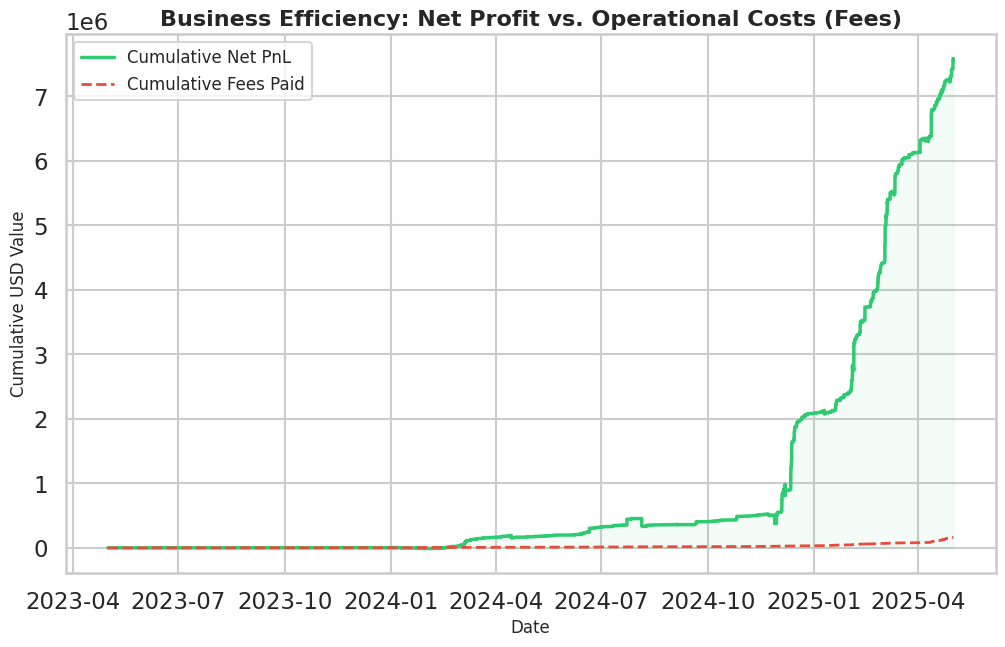

In [55]:
# Sort by time for cumulative calculation
df_sorted = historical_data.sort_values('datetime')
df_sorted['CumPnL'] = df_sorted['Closed PnL'].cumsum()
df_sorted['CumFee'] = df_sorted['Fee'].cumsum()

plt.figure(figsize=(12, 7))
plt.plot(df_sorted['datetime'], df_sorted['CumPnL'], label='Cumulative Net PnL', color='#2ecc71', linewidth=2.5)
plt.plot(df_sorted['datetime'], df_sorted['CumFee'], label='Cumulative Fees Paid', color='#e74c3c', linestyle='--', linewidth=2)
plt.title('Business Efficiency: Net Profit vs. Operational Costs (Fees)', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cumulative USD Value', fontsize=12)
plt.legend(fontsize=12)
plt.fill_between(df_sorted['datetime'], df_sorted['CumPnL'], color='#2ecc71', alpha=0.05) # Green glow


In [56]:
plt.savefig(os.path.join(output_dir, 'fee_vs_pnl.png'), bbox_inches='tight')
plt.show()

<Figure size 640x480 with 0 Axes>

### Creating Realized PNL and Drawdown curve

In [57]:
# A. Realized PnL
realized_pnl = historical_data[historical_data['Closed PnL'] != 0]['Closed PnL']

# B. Drawdown Curve
historical_data['Cumulative PnL'] = historical_data['Closed PnL'].cumsum()
historical_data['High Water Mark'] = historical_data['Cumulative PnL'].cummax()
historical_data['Drawdown'] = historical_data['Cumulative PnL'] - historical_data['High Water Mark']

# Calculating Max Drawdown (MDD)
mdd = historical_data['Drawdown'].min()

# Getting the date of the max drawdown safely
if not historical_data['Drawdown'].isna().all():
    mdd_date = historical_data.loc[historical_data['Drawdown'] == mdd, 'datetime'].iloc[0]
else:
    mdd = 0
    mdd_date = historical_data['datetime'].iloc[0]

### **Plot F: Risk Profile: PnL Distribution & Tail Risk**

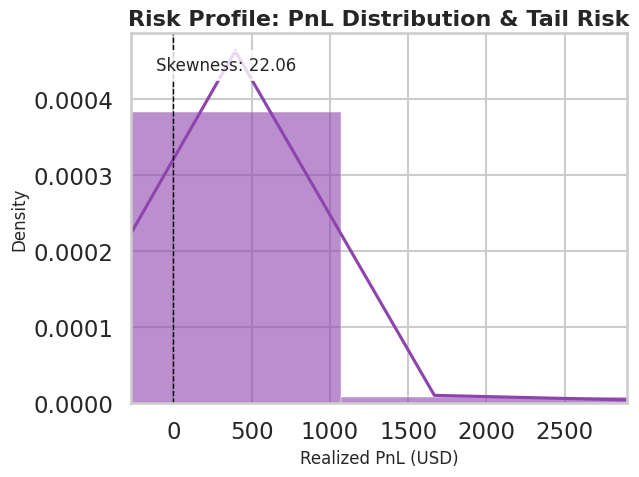

<Figure size 1200x600 with 0 Axes>

In [58]:
# Histogram with KDE
sns.histplot(realized_pnl, bins=100, kde=True, color='#8e44ad', stat='density', alpha=0.6)

# Adding reference line at 0
plt.axvline(0, color='black', linestyle='--', linewidth=1)

# Annotations for Skewed data
skew = realized_pnl.skew()
plt.text(0.05, 0.9, f'Skewness: {skew:.2f}', transform=plt.gca().transAxes,
         fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

# Formatting to handle outliers
plt.xlim(realized_pnl.quantile(0.01), realized_pnl.quantile(0.99))
plt.title('Risk Profile: PnL Distribution & Tail Risk', fontsize=16, fontweight='bold')
plt.xlabel('Realized PnL (USD)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.figure(figsize=(12, 6))
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'risk_pnl_distribution.png'))
plt.show()

### **Plot G: Capital Preservation: Drawdown Chart**

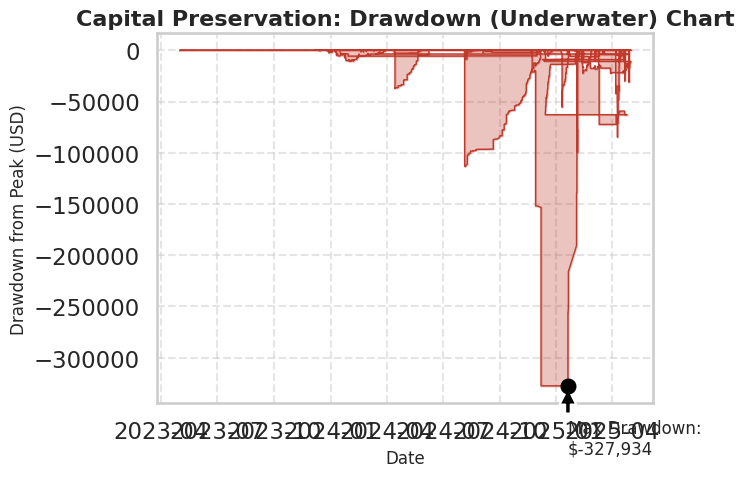

<Figure size 1200x600 with 0 Axes>

In [59]:
# Filling the area for drawdown
plt.fill_between(historical_data['datetime'], historical_data['Drawdown'], 0, color='#c0392b', alpha=0.3)
plt.plot(historical_data['datetime'], historical_data['Drawdown'], color='#c0392b', linewidth=1)

# Highlighting the Max Drawdown
plt.scatter([mdd_date], [mdd], color='black', s=100, zorder=5)
plt.annotate(f'Max Drawdown:\n${mdd:,.0f}',
             xy=(mdd_date, mdd),
             xytext=(mdd_date, mdd*1.2),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12)

plt.title('Capital Preservation: Drawdown (Underwater) Chart', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Drawdown from Peak (USD)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.figure(figsize=(12, 6))
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'risk_drawdown.png'))
plt.show()

In [60]:
print(f"Risk visualizations saved to {output_dir}")
print(f"   - Max Drawdown: ${mdd:,.2f}")

Risk visualizations saved to ds_/outputs
   - Max Drawdown: $-327,934.10


### **Plot H: Asset Performance**

/tmp/ipython-input-3702805499.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=combined_pnl.values, y=combined_pnl.index, palette=colors)


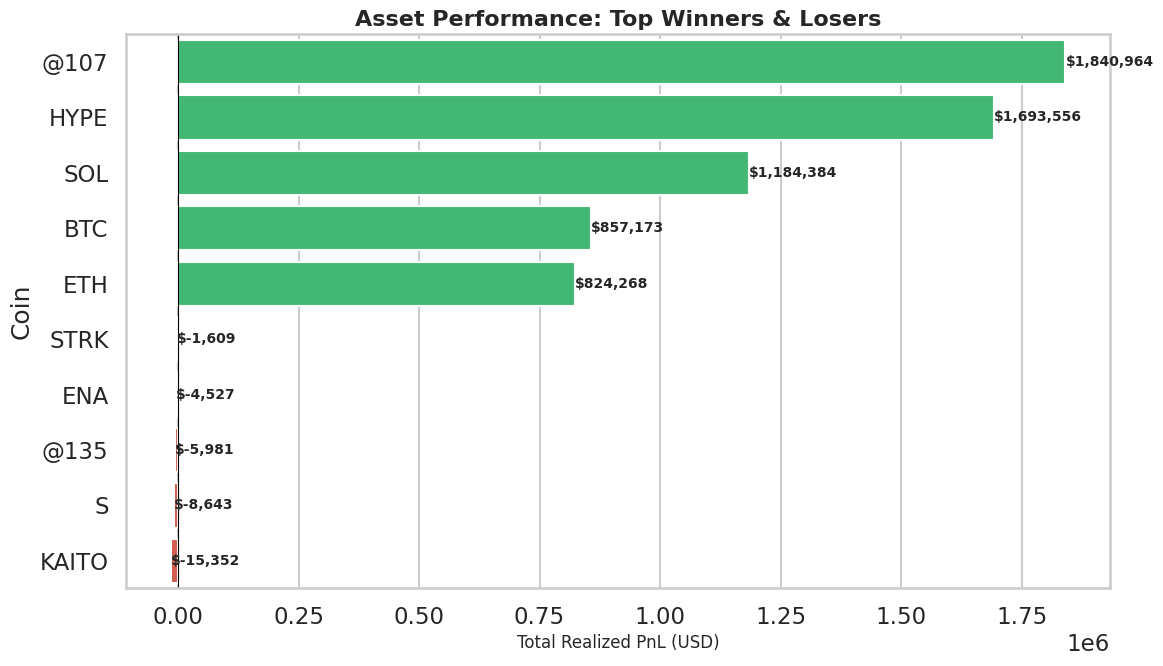

In [61]:
if 'historical_data' in locals():
    coin_pnl = historical_data.groupby('Coin')['Closed PnL'].sum().sort_values(ascending=False)

    # Get Top 5 Winners and Bottom 5 Losers
    top_winners = coin_pnl.head(5)
    top_losers = coin_pnl.tail(5)
    combined_pnl = pd.concat([top_winners, top_losers])

    plt.figure(figsize=(12, 7))
    # Color logic: Green for Profit, Red for Loss
    colors = ['#2ecc71' if x > 0 else '#e74c3c' for x in combined_pnl.values]

    sns.barplot(x=combined_pnl.values, y=combined_pnl.index, palette=colors)
    plt.title('Asset Performance: Top Winners & Losers', fontsize=16, fontweight='bold')
    plt.xlabel('Total Realized PnL (USD)', fontsize=12)
    plt.axvline(0, color='black', linewidth=0.8)

    # Adding labels
    for i, v in enumerate(combined_pnl.values):
        offset = 500 if v > 0 else -500
        plt.text(v, i, f'${v:,.0f}', va='center', fontsize=10, fontweight='bold')

    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, 'asset_performance.png'))
    plt.show()

### **Plot I: SESSION PROFITABILITY (PnL by Hour)**

In [62]:
historical_data['datetime'] = pd.to_datetime(historical_data['Timestamp IST'], dayfirst=True, errors='coerce')
historical_data['Hour'] = historical_data['datetime'].dt.hour

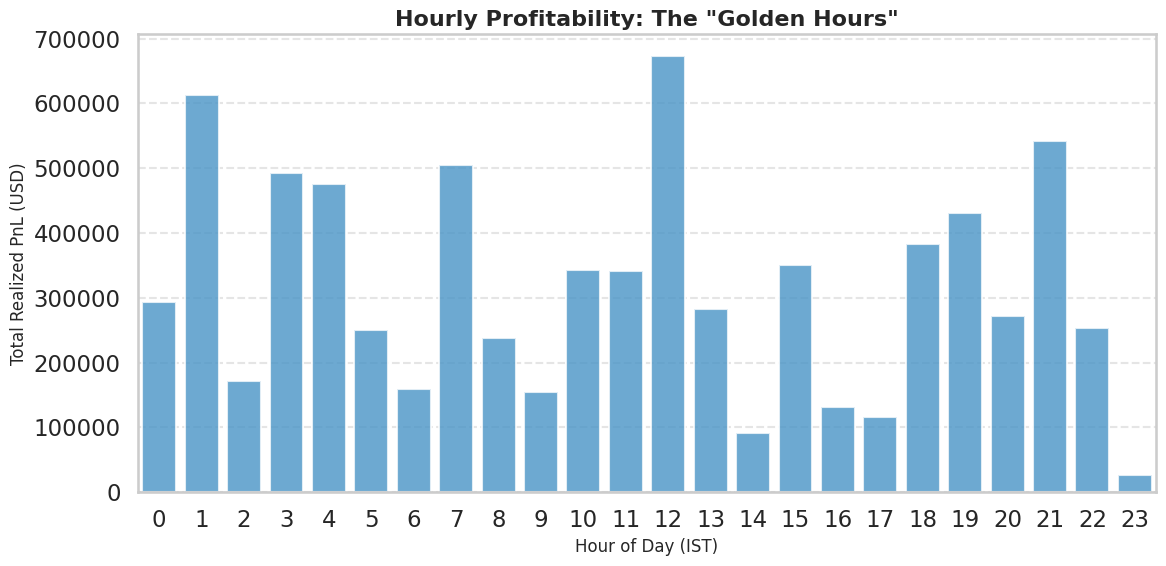

In [63]:
if 'historical_data' in locals():
    hourly_pnl = historical_data.groupby('Hour')['Closed PnL'].sum()

    plt.figure(figsize=(12, 6))
    sns.barplot(x=hourly_pnl.index, y=hourly_pnl.values, color='#3498db', alpha=0.8)

    plt.title('Hourly Profitability: The "Golden Hours"', fontsize=16, fontweight='bold')
    plt.xlabel('Hour of Day (IST)', fontsize=12)
    plt.ylabel('Total Realized PnL (USD)', fontsize=12)
    plt.axhline(0, color='black', linewidth=0.8)
    plt.grid(axis='y', linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, 'hourly_pnl.png'))
    plt.show()


### **Plot J: Market Regime Overlay**

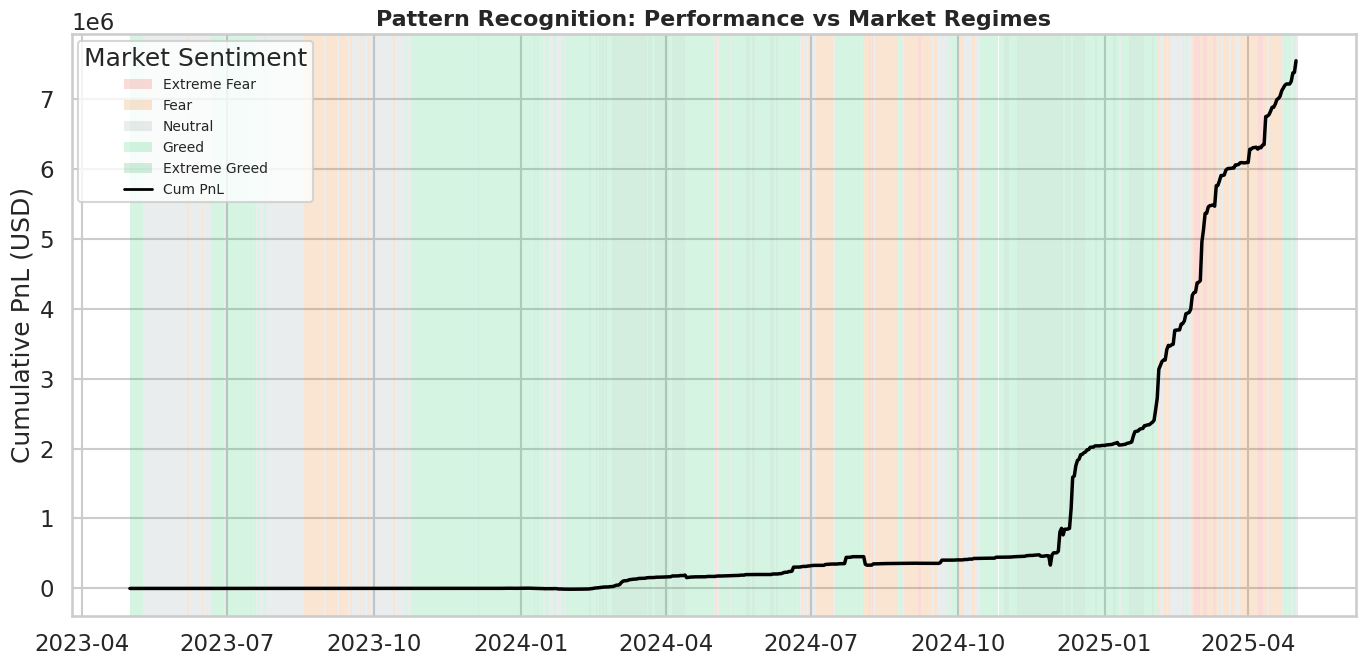

In [64]:
if 'merged' in locals():

    # Preparing the Data
    daily_pnl = merged.groupby('date')['Closed PnL'].sum().reset_index()
    daily_pnl['CumPnL'] = daily_pnl['Closed PnL'].cumsum()

    # Continuous date range
    date_range = pd.date_range(daily_pnl['date'].min(), daily_pnl['date'].max())
    sentiment_map = fear_greed_index.set_index('date')['classification']

    full_df = pd.DataFrame({'date': date_range})
    full_df = pd.merge(full_df, daily_pnl, on='date', how='left')
    full_df['CumPnL'] = full_df['CumPnL'].ffill().fillna(0)
    full_df['Sentiment'] = full_df['date'].map(sentiment_map)

    # Plotting
    fig, ax = plt.subplots(figsize=(14, 7))
    ax.plot(full_df['date'], full_df['CumPnL'], color='black', linewidth=2.5, label='Strategy Cumulative PnL')

    # Background Colors
    regime_colors = {
        'Extreme Fear': '#e74c3c', 'Fear': '#e67e22',
        'Neutral': '#95a5a6', 'Greed': '#2ecc71', 'Extreme Greed': '#27ae60'
    }

    # Draw Spans
    full_df['Sentiment_Shift'] = full_df['Sentiment'].ne(full_df['Sentiment'].shift())
    change_indices = full_df.index[full_df['Sentiment_Shift']].tolist()
    change_indices.append(len(full_df))

    for i in range(len(change_indices)-1):
        start_idx = change_indices[i]
        end_idx = change_indices[i+1]
        segment_sentiment = full_df['Sentiment'].iloc[start_idx]
        if pd.isna(segment_sentiment): continue
        start_date = full_df['date'].iloc[start_idx]
        end_date = full_df['date'].iloc[end_idx-1] + pd.Timedelta(days=1)

        ax.axvspan(start_date, end_date, color=regime_colors.get(segment_sentiment, 'white'), alpha=0.2, lw=0)

    # Legend & Titles
    from matplotlib.patches import Patch
    legend_elements = [Patch(facecolor=c, edgecolor='none', alpha=0.2, label=l) for l, c in regime_colors.items()]
    legend_elements.append(plt.Line2D([0], [0], color='black', lw=2, label='Cum PnL'))

    ax.legend(handles=legend_elements, loc='upper left', fontsize=10, title='Market Sentiment')
    ax.set_title('Pattern Recognition: Performance vs Market Regimes', fontsize=16, fontweight='bold')
    ax.set_ylabel('Cumulative PnL (USD)')

    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, 'pattern_regime_overlay.png'))
    plt.show()


###  **Plot K: Rolling Prediction Chart**

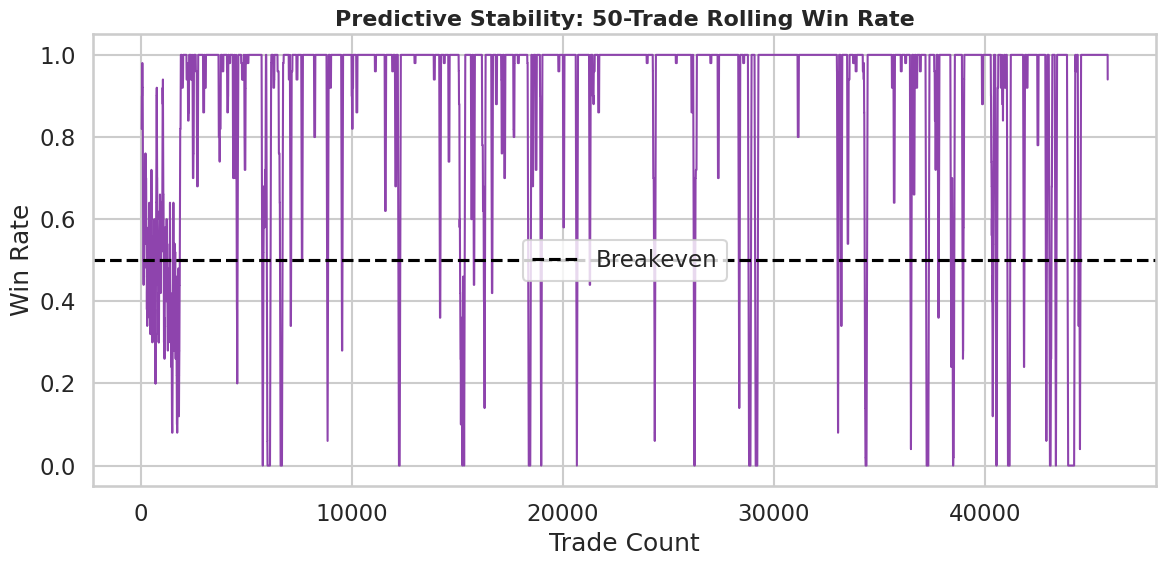

In [65]:
if 'merged' in locals():

    trades_sorted = merged.sort_values('datetime').dropna(subset=['Closed PnL'])
    trades_sorted = trades_sorted[trades_sorted['Closed PnL'] != 0]
    trades_sorted['Win'] = (trades_sorted['Closed PnL'] > 0).astype(int)

    window = 50
    trades_sorted['Rolling_WinRate'] = trades_sorted['Win'].rolling(window=window).mean()

    plt.figure(figsize=(12, 6))
    plt.plot(range(len(trades_sorted)), trades_sorted['Rolling_WinRate'], color='#8e44ad', linewidth=1.5)

    plt.axhline(0.5, color='black', linestyle='--', label='Breakeven')
    plt.title(f'Predictive Stability: {window}-Trade Rolling Win Rate', fontsize=16, fontweight='bold')
    plt.xlabel('Trade Count')
    plt.ylabel('Win Rate')
    plt.legend()

    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, 'pattern_rolling_stability.png'))

    # Force Show
    plt.show()